# Chinese data

## Import data and packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='CHN']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='CHN']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='CHN']
pop_table.drop('Entity', axis=1, inplace=True)
pop_table.drop('Code', axis=1, inplace=True)

CH_table = pd.merge(gdp_table, pop_table, on=['Year'])
CH_table = pd.merge(CH_table, energy_table, on=['Year'])


In [11]:
pop = CH_table['Total population (Gapminder, HYDE & UN)']
gdp = CH_table['GDP per capita']*pop
energy = CH_table['Primary energy consumption (TWh)']
year = CH_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

## Explore data 

285.0221739710789 -559226.0852424174 1800 500 1 2000 2013 2200


(0.0, 140.6)

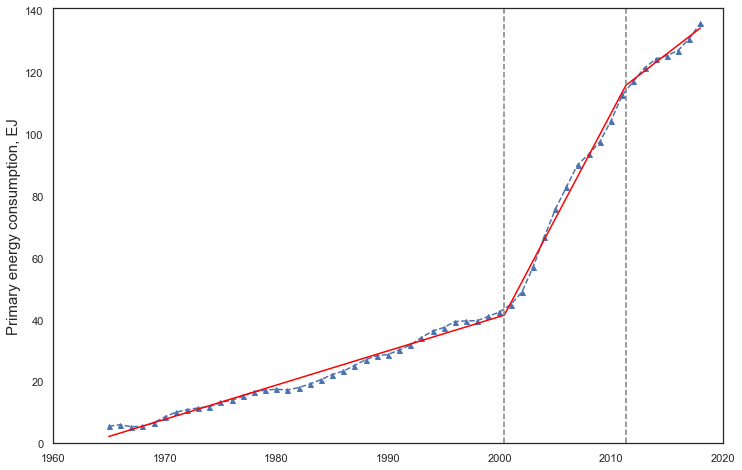

In [12]:
import math as math
plt.figure(figsize=(12,8))
plt.plot(year, 3.6*energy*0.001, linestyle='dashed', marker='^', markersize=5)
a, b = reg.linReg(year[:30], energy[:30])
a,b, c, e, g, x1, x2, x3 = a, b, 1800, 500, 1, 2000, 2013, 2200
print(a,b, c, e, g, x1, x2, x3)
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy, p0 =(a,b, c, e, g, x1, x2, x3 ), bounds = [-60000000, 90000000])
plt.plot(yplot, 3.6*reg.llll(yplot, a,b, c, e, g, x1, x2, x3 )*0.001, color='red')
plt.plot([x1, x1], [0, 38*3.7], label=str(int(x1)),linestyle='dashed', color= 'grey')
plt.plot([x2, x2], [0, 38*3.7], label=str(int(x2)),linestyle='dashed', color='grey')

plt.ylabel("Primary energy consumption, EJ", fontsize=15)
ypred= 3.6*reg.llll(year, a,b, c, e, g, x1, x2, x3 )
CH_table['Energy(PJ)-Time(Year)']=ypred
plt.xlim(1960,2020)
plt.ylim(0, 38*3.7)


(0.0, 20000000000000.0)

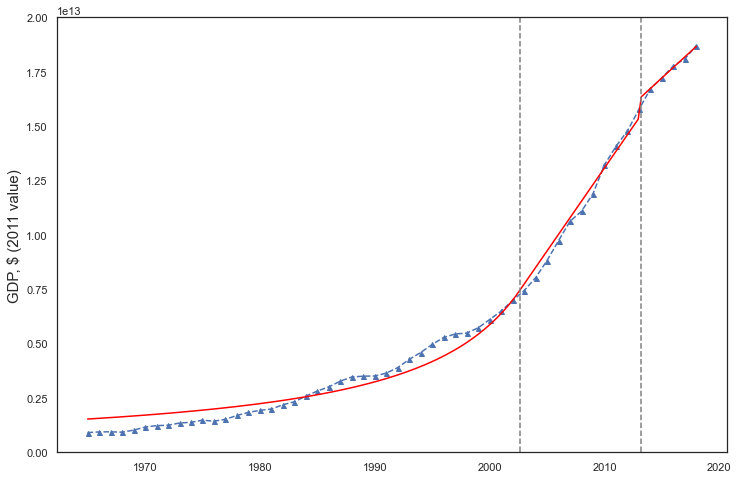

In [13]:
plt.figure(figsize=(12,8))
plt.plot(year, gdp, linestyle='dashed', marker='^', markersize=5)
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
b,c,d,f,h,k,x1,x2, x3, x4 = 12, 1983,0.033,0.025, 0.017,0.000, 1971,2009, 2015, 7000
b,c,d,f,h,k,x1,x2, x3, x4 = reg.hypLLLL(year, gdp/(10**12), p0 = (b,c,d,f,h,k,x1,x2, x3, x4))
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
# b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot(yplot, (10**12)*reg.hypllll(yplot,b,c,d,f,h,k,x1,x2,x3,x4), color='red')
plt.plot([x1, x1], [0, 20*10**12], label=str(int(x1)), linestyle='dashed', color='grey')
plt.plot([x3, x3], [0, 20*10**12], label=str(int(x3)), linestyle='dashed', color='grey')

plt.ylabel('GDP, $ (2011 value)', fontsize=15)
# ypred = reg.hyp_lin_lin(year,b,c,d,f,x1,x2 )*(10**12)
CH_table['GDP(2011$)-Time(year)'] = ypred
plt.ylim(0, 20*10**12)


(0.0, 10.5)

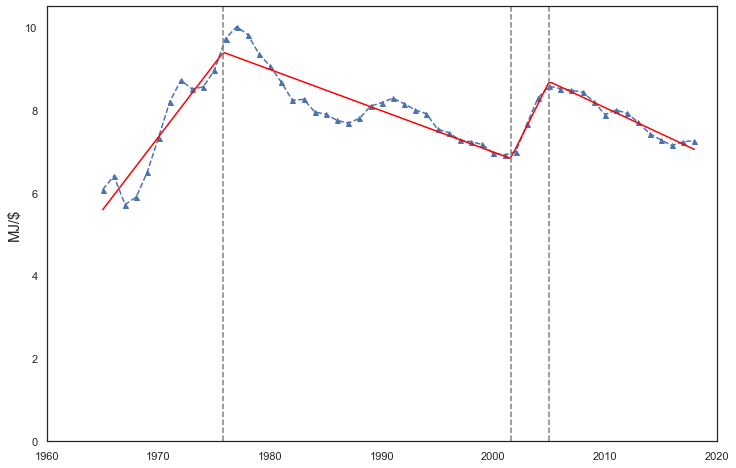

In [14]:
plt.figure(figsize=(12,8))
plt.plot(year,(energy/gdp)*3.6*10**9, linestyle='dashed', marker='^', markersize=5)
a,b, c, e, g, x1, x2, x3 = 0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,2006
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, (energy/gdp)*10**9*3.6, p0 = (0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,2006)) 
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3),  color='red')
plt.plot([x1, x1], [0, 3*3.6], label=str(int(x1)), linestyle='dashed', color='grey')
plt.plot([x2, x2], [0, 3*3.6], label=str(int(x2)),linestyle='dashed', color='grey')
plt.plot([x3, x3], [0, 3*3.6], label=str(int(x3)),linestyle='dashed', color='grey')
plt.ylabel("MJ/$", fontsize=15)
ypred = reg.llll(year, a,b, c, e, g, x1, x2, x3)*3.6/(10**9)
CH_table['EI(PJ/$)-Time(year)'] = ypred
plt.xlim(1960, 2020)
plt.ylim(0,10.5)

(3.05132, 2.5276982164723716e-05, 9.999725341796875, 1.777643221482416e-06, 1.307952188311994e-06, -7.132659563039298e-07)


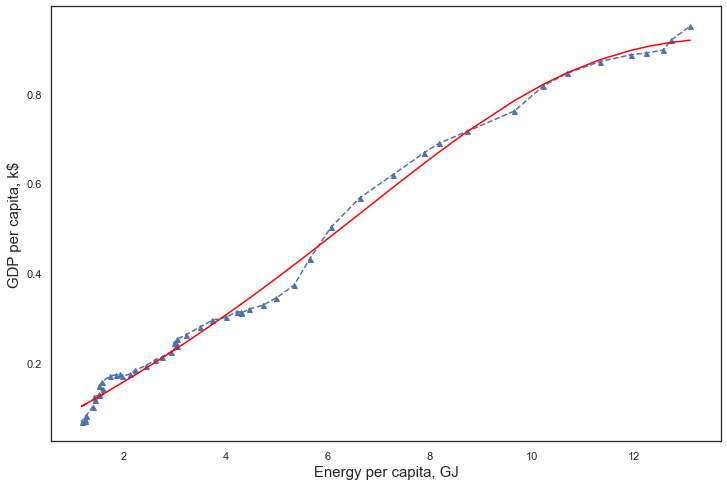

In [15]:
plt.figure(figsize=(12,8))
g =gdp/pop/1000
e = energy*3.6/pop
plt.plot(g,e*10**4, linestyle='dashed', marker='^', markersize=5)
plt.xlabel("Energy per capita, GJ" , fontsize=15)
plt.ylabel("GDP per capita, k$", fontsize=15)
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, maxfev=10000000000)
plt.plot(g, 10**4*reg.s_model(g,G_i, E_i, A, a1, a2, a3 ), color='red' )


Text(0.5, 1.0, 'Variation in (%), China')

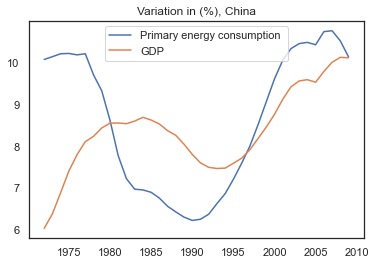

In [16]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), China")


## Save table

In [21]:
CH_table =CH_table.rename(columns={ 'Primary energy consumption (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })
CH_table['Primary energy (PJ)']=3.6*energy
CH_table.to_csv('../BDD/CHN.csv', index=False)

In [20]:
CH_table.head()

,Year,GDP per capita,Population,Entity,Code,Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),EI(PJ/$)-Time(year),Primary energy (PJ)
0,1965,1253.0,724219008,China,CHN,1532.235,2202.635580,2202.635580,2.013285e-08,5516.0460
1,1966,1261.0,742414976,China,CHN,1665.280,3309.789364,3309.789364,2.139938e-08,5995.0080
2,1967,1237.0,762580992,China,CHN,1497.596,4416.943148,4416.943148,2.266591e-08,5391.3456
3,1968,1178.0,784075008,China,CHN,1512.598,5524.096932,5524.096932,2.393244e-08,5445.3528
4,1969,1264.0,805985984,China,CHN,1841.019,6631.250716,6631.250716,2.519897e-08,6627.6684
